## **Lines truncation**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

Function to truncate line given by two points ((x1, y1) and (x2, y2)), to fit it to rectangle which size is window height and width reduced by frame.

In [14]:
def truncate(x1, x2, y1, y2, win, frame):
	if (((x1 < frame) and (x2 < frame)) or
		((x1 > win[1] - frame) and (x2 > win[1] - frame))):
		return None
	flag = 0
	if (x2 is not x1):
		flag = 1
		if (x1 > x2):
			x1, x2 = x2, x1
			y1, y2 = y2, y1
		k = (y2 - y1) / (x2 - x1)
		if (x1 < frame):
			y1 = y1 + (frame - x1) * k
			x1 = frame
		if (x2 > win[1] - frame):
			y2 = y2 + (win[1] - frame - x2) * k
			x2 = win[1] - frame
	if ((y1 < frame and y2 < frame) or (y1 > win[0] - frame and y2 > win[0] - frame)):
		return None
	if (y1 < frame):
		if (flag):
			x1 = x1 + (frame - y1) / k * flag
		y1 = frame
	if (y1 > win[0] - frame):
		if (flag):
			x1 = x1 + (win[0] - frame - y1) / k * flag
		y1 = win[0] - frame
	if (y2 < frame):
		if (flag):
			x2 = x2 + (frame - y2) / k * flag
		y2 = frame
	if (y2 > win[0] - frame):
		if (flag):
			x2 = x2 + (win[0] - frame - y2) / k * flag
		y2 = win[0] - frame
	return x1, x2, y1, y2



Test

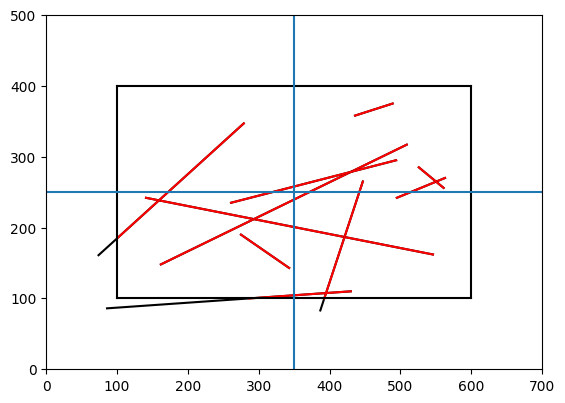

In [15]:
# initizing window and rectangle size

win = (500, 700)
frame = 100

for i in range(10):
	# creating random line lying inside window
	x1, x2 = tuple(randrange(win[1] - 2 * frame + 100) for i in range(2))
	y1, y2 = tuple(randrange(win[0] - 2 * frame + 100) for i in range(2))
	# creating tuncated line coordinates
	a = truncate(x1, x2, y1, y2, win, frame)
	# plotting old line
	plt.plot([x1, x2], [y1, y2], 'k-')
	# plotting truncated line
	if (a is not None):
		plt.plot(a[0:2], a[2:4], 'r-')

# plotting rectangle
plt.plot([frame, win[1] - frame], [frame, frame], 'k-')
plt.plot([frame, win[1] - frame], [win[0] - frame, win[0] - frame], 'k-')
plt.plot([frame, frame], [frame, win[0] - frame], 'k-')
plt.plot([win[1] - frame, win[1] - frame], [frame, win[0] - frame], 'k-')
# putting axes and setting displaying area 
plt.axhline(win[0] / 2)
plt.axvline(win[1] / 2)
plt.xlim((0, win[1]))
plt.ylim((0, win[0]))
plt.gca().set_aspect("equal")

plt.show()
